<a href="https://colab.research.google.com/github/BrevinBrown/BrevinBrown/blob/main/HW0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

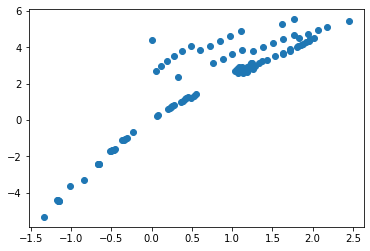

In [34]:
from numpy.lib.function_base import gradient
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/D3.csv')
#dataset.head(20)

#putting data into variables
X1 = dataset.iloc[:,0].values
X2 = dataset.iloc[:,1].values
X3 = dataset.iloc[:,2].values
Y  = dataset.iloc[:,3].values

#plots to test 
#plt.scatter(X1,Y)
#plt.scatter(X2,Y)
#plt.scatter(X3,Y)

def gradientDecent(X,Y,theta, learningRate,steps):
  
  m=len(Y)
  for _ in range(steps) :
        error=(X*theta)-Y
        theta=theta-((learningRate/m)*X*error)

  return theta
theta1 = gradientDecent(X1,Y,0,0.05,1000)
theta2 = gradientDecent(X2,Y,0,0.1,1000)
theta3 = gradientDecent(X3,Y,0,0.1,1000)



